# L.3 Clustering 🐍

In [8]:
# Include numpy and link instance to variable np
import numpy as np

# Include library and link instance to plt
import matplotlib.pyplot as plt

# Scikit learn for data set and other methods
from sklearn import datasets

## 3.1 Manual clustering

1. Determine the distances for each point to the given centroids
2. Assign the nearest centroid as class
3. Determine centroid for a given class
4. Repeat

### 3.1.1 Create data set

In [9]:
iris = datasets.load_iris()
x_iris = iris.data[:, :2]
y_iris = iris.target

### 3.1.2 Tools

In [10]:
def random_means(k=3, xmin=4, xmax=8, ymin=2, ymax=4.2):
    """
    Returns n random point as tuple
    :param k: amount of means to be determined
    :type k: int
    :type xmin: minimum x value
    :type xmin: float
    :type xmax: maximum x value
    :type xmax: float
    :type ymin: minimum y value
    :type ymin: float
    :type ymax: maximum y value
    :type ymax: float
    
    :returns: random mean values
    :rtype: np.array
    """ 
    return np.array(list(zip(np.random.uniform(xmin, xmax, k), np.random.uniform(ymin, ymax, k))))

def random_samples(x, y, k=3):
    """
    Select k random samples of given dataset (x, y)
    :param x: input x values
    :type x: np.array, list
    :param y: input y values
    :type y: np.array, list
    :param k: amount of points
    :type k: int
    :returns: random sample points
    :rtype: np.array
    """
    pos = np.random.randint(x.size, size=k)
    return np.array(list(zip(x[pos], y[pos])))

def eucl_dis(p1, p2):
    """
    Determines the euclidean distance between p1 and p2
    :param p1: point 1 [x1, y1]
    :type p1: np.array
    :param p2: point 2 [x2, y2]
    :type p2: np.array
    :returns: euclidean distance
    :rtype: float
    """
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def iterative_centroids(x, y, c, k):
    x_mean = []
    y_mean = []
    if not isinstance(c, np.ndarray):
        c = np.array(c)
    
    for i in range(k):        
        x_mean.append(np.nanmean(x[np.flatnonzero(c==i)]))
        y_mean.append(np.nanmean(y[np.flatnonzero(c==i)]))

    return np.array([x_mean, y_mean]).T

### 3.1.3 Initial assumptions

In [11]:
# Initial class assumption
k = 3
# Use random samples as centroids (1) or grap random samples from existing set (0)
use_random_centroids = False

In [12]:
# Get initial controids
if use_random_centroids:
    # Totally random
    centroids = random_means(k=k) 
else:
    # Select k samples from dataset
    centroids = random_samples(x=x_iris[:, 0], y=x_iris[:, 1], k=k) 

initial_centroids = centroids.copy()  # Just for drawing purposes

### 3.1.4 Manuel k-means clustering

Convergence in iteration: 7


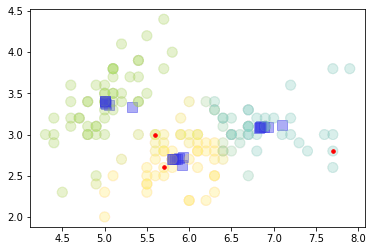

In [13]:
# Visualize the data 
fig, ax = plt.subplots()

# Define the maximal amount of iterations
max_iterations = 30
loop = 1
convergence_criteria = 0.1

cost_per_iteration = []  # Will hold all cost values per iteration

while (loop < max_iterations):
    # Alolocate empty lists
    cluster_classes = []
    iteration_cost = []

    # Iterate over all points to get the overall distances to mean etc. 
    for i in range(0, x_iris[:, 0].size):
        
        # Determine euclidean distance for each centroid
        distance_to_centroid = [] # (Re-)allocate list
        
        # For each k, determine the distance of each data point to the centroids
        for j in range(k): 
            distance_to_centroid.append(eucl_dis([centroids[j, 0], centroids[j, 1]], [x_iris[i, 0], x_iris[i, 1]]))
        
        # Use the minimal distance to assign the index as class
        cluster_classes.append(np.argmin(distance_to_centroid))
    
    # Determine costs for each iteration
    iteration_cost.append(eucl_dis([centroids[cluster_classes, 0], centroids[cluster_classes, 1]], [x_iris[:, 0], x_iris[:, 1]]))

    # Update new centroids
    centroids = iterative_centroids(x_iris[:, 0], x_iris[:, 1], cluster_classes, k)

    # Plot the data
    ax.scatter(x_iris[:, 0], x_iris[:, 1], c=cluster_classes, cmap=plt.cm.Set3, alpha=0.05, s=100, label='data point')
    ax.scatter(centroids[:, 0], centroids[:, 1], color=[0.2,0.2,0.9], s=100, alpha=0.4, marker='s', label='determined centroids')
    
    # Get the sum of the costs
    cost_per_iteration.append(np.sum(iteration_cost))
    
    if loop >=2:
        if np.abs(cost_per_iteration[-1] - cost_per_iteration[-2]) <= convergence_criteria:
            print('Convergence in iteration: ' + str(loop))
            break
    
    # Increment counter
    loop += 1
ax.scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='r', s=50, marker='.', label='Initial centroids')

Text(0, 0.5, '$C(x^{(k)}, \\mu)$')

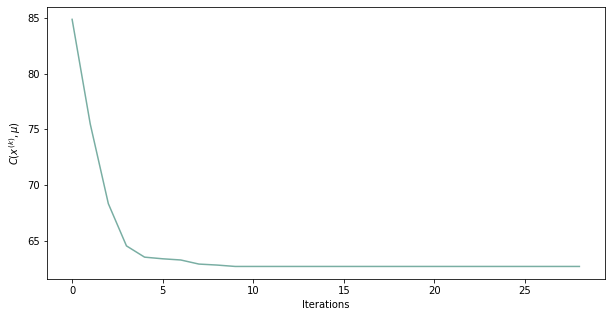

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
iterations = range(len(cost_per_iteration))
ax.plot(iterations, cost_per_iteration, color='#79AEA3')

ax.set_xlabel('Iterations')
ax.set_ylabel(r'$C(x^{(k)}, \mu)$')

## 3.12 scikit-learn 
[Scikit-Learn](https://scikit-learn.org/stable/user_guide.html) is widely used library for machine learning. Especially Classification, regression and clustering

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

We recommend this [Examples](https://scikit-learn.org/stable/auto_examples/index.html)

<ipython-input-9-20a746ea76b9>:26: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
<ipython-input-9-20a746ea76b9>:26: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
<ipython-input-9-20a746ea76b9>:26: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the 

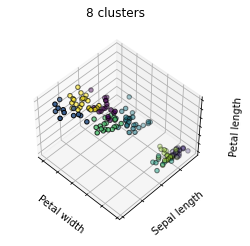

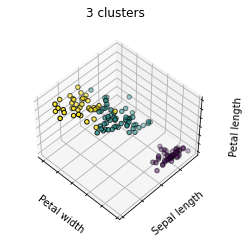

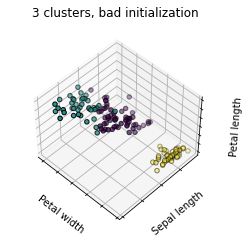

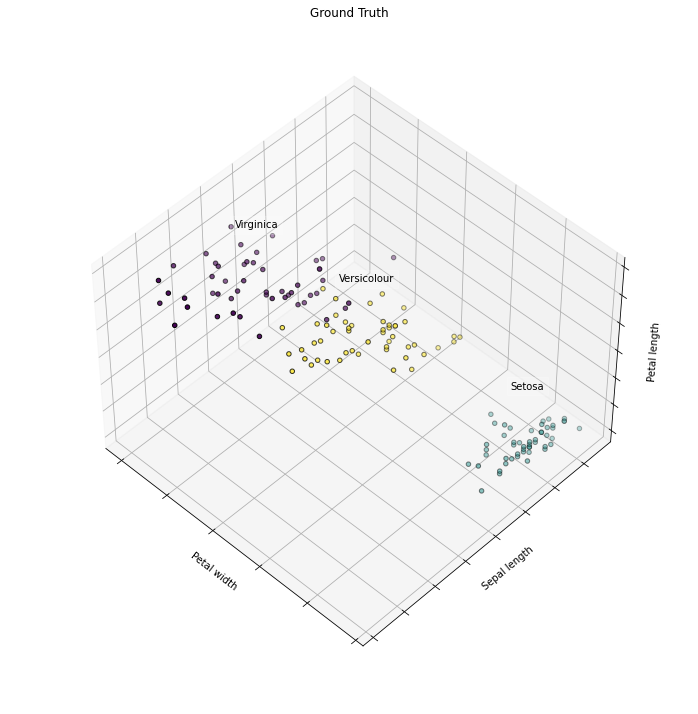

In [9]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean() + 2, name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorde the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()